In [29]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [30]:
df = pd.read_csv('Fish.csv')
df

Species  Weight  VerticalLen  DiagonalLen  CrossLen   Height   Width
0     Bream   242.0         23.2         25.4      30.0  11.5200  4.0200
1     Bream   290.0         24.0         26.3      31.2  12.4800  4.3056
2     Bream   340.0         23.9         26.5      31.1  12.3778  4.6961
3     Bream   363.0         26.3         29.0      33.5  12.7300  4.4555
4     Bream   430.0         26.5         29.0      34.0  12.4440  5.1340
..      ...     ...          ...          ...       ...      ...     ...
154   Smelt    12.2         11.5         12.2      13.4   2.0904  1.3936
155   Smelt    13.4         11.7         12.4      13.5   2.4300  1.2690
156   Smelt    12.2         12.1         13.0      13.8   2.2770  1.2558
157   Smelt    19.7         13.2         14.3      15.2   2.8728  2.0672
158   Smelt    19.9         13.8         15.0      16.2   2.9322  1.8792

[159 rows x 7 columns]

In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 159 entries, 0 to 158
Data columns (total 7 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Species      159 non-null    object 
 1   Weight       159 non-null    float64
 2   VerticalLen  159 non-null    float64
 3   DiagonalLen  159 non-null    float64
 4   CrossLen     159 non-null    float64
 5   Height       159 non-null    float64
 6   Width        159 non-null    float64
dtypes: float64(6), object(1)
memory usage: 8.8+ KB


In [32]:
df.corr()

C:\Users\Admin\AppData\Local\Temp\ipykernel_14404\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


Weight  VerticalLen  DiagonalLen  CrossLen    Height     Width
Weight       1.000000     0.915712     0.918618  0.923044  0.724345  0.886507
VerticalLen  0.915712     1.000000     0.999517  0.992031  0.625378  0.867050
DiagonalLen  0.918618     0.999517     1.000000  0.994103  0.640441  0.873547
CrossLen     0.923044     0.992031     0.994103  1.000000  0.703409  0.878520
Height       0.724345     0.625378     0.640441  0.703409  1.000000  0.792881
Width        0.886507     0.867050     0.873547  0.878520  0.792881  1.000000

C:\Users\Admin\AppData\Local\Temp\ipykernel_14404\2306853626.py:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), annot =True)


Text(0.5, 1.0, 'Correlation Matrix')

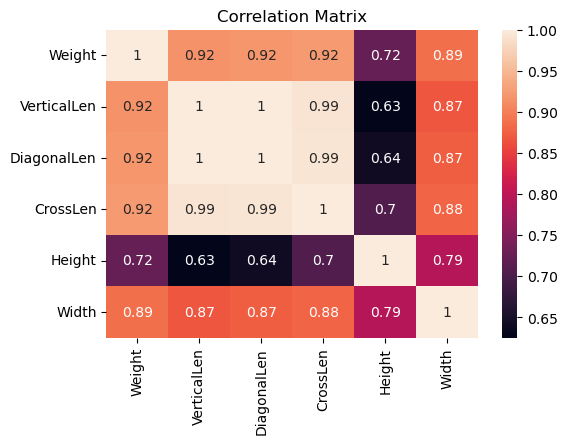

In [33]:
plt.rcParams["figure.figsize"] = (6,4)
sns.heatmap(df.corr(), annot =True)
plt.title('Correlation Matrix')

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

# one hot encoding

In [35]:
encode_species = pd.get_dummies(df.Species)
encode_species.head(5)

Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish
0      1       0      0     0      0      0          0
1      1       0      0     0      0      0          0
2      1       0      0     0      0      0          0
3      1       0      0     0      0      0          0
4      1       0      0     0      0      0          0

# Label encoding

In [36]:
df["Species"] = df["Species"].astype('category')
label_ecnoding_species = df["Species"].cat.codes
label_ecnoding_species

0      0
1      0
2      0
3      0
4      0
      ..
154    5
155    5
156    5
157    5
158    5
Length: 159, dtype: int8

In [37]:
new_df = pd.concat([df, encode_species], axis='columns')
new_df

Species  Weight  VerticalLen  DiagonalLen  CrossLen   Height   Width  \
0     Bream   242.0         23.2         25.4      30.0  11.5200  4.0200   
1     Bream   290.0         24.0         26.3      31.2  12.4800  4.3056   
2     Bream   340.0         23.9         26.5      31.1  12.3778  4.6961   
3     Bream   363.0         26.3         29.0      33.5  12.7300  4.4555   
4     Bream   430.0         26.5         29.0      34.0  12.4440  5.1340   
..      ...     ...          ...          ...       ...      ...     ...   
154   Smelt    12.2         11.5         12.2      13.4   2.0904  1.3936   
155   Smelt    13.4         11.7         12.4      13.5   2.4300  1.2690   
156   Smelt    12.2         12.1         13.0      13.8   2.2770  1.2558   
157   Smelt    19.7         13.2         14.3      15.2   2.8728  2.0672   
158   Smelt    19.9         13.8         15.0      16.2   2.9322  1.8792   

     Bream  Parkki  Perch  Pike  Roach  Smelt  Whitefish  
0        1       0      0     0      0      0          0  
1        1       0      0     0      0      0          0  
2        1       0      0     0      0      0          0  
3        1       0      0     0      0      0          0  
4        1       0      0     0      0      0          0  
..     ...     ...    ...   ...    ...    ...        ...  
154      0       0      0     0      0      1          0  
155      0       0      0     0      0      1          0  
156      0       0      0     0      0      1          0  
157      0       0      0     0      0      1          0  
158      0       0      0     0      0      1          0  

[159 rows x 14 columns]

In [38]:
X = new_df[[
    'VerticalLen', 'DiagonalLen', 'CrossLen', 'Height', 'Width',
    'Bream', 'Parkki', 'Perch', 'Pike', 'Roach', 'Smelt', 'Whitefish'
]]
y = new_df['Weight']

In [39]:
X = X.values
y = y.values

In [40]:
X_data = np.hstack((np.ones((X.shape[0], 1)), X))
X_data

array([[ 1. , 23.2, 25.4, ...,  0. ,  0. ,  0. ],
       [ 1. , 24. , 26.3, ...,  0. ,  0. ,  0. ],
       [ 1. , 23.9, 26.5, ...,  0. ,  0. ,  0. ],
       ...,
       [ 1. , 12.1, 13. , ...,  0. ,  1. ,  0. ],
       [ 1. , 13.2, 14.3, ...,  0. ,  1. ,  0. ],
       [ 1. , 13.8, 15. , ...,  0. ,  1. ,  0. ]])

In [41]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 13)
X_test shape:  (32, 13)
y_train shape:  (127,)
y_train shape:  (32,)


# linear regression

In [42]:
def r2score(y_pred, y):
    rss = np.sum((y_pred - y) ** 2)
    tss = np.sum((y-y.mean()) ** 2)

    r2 = 1 - (rss / tss)
    return r2
class LinearRegression:
    def __init__(self, X_data, y_target, learning_rate=0.00001, num_epochs=10000):
        self.X_data = X_data
        self.y_target = y_target
        self.learning_rate = learning_rate
        self.num_epochs = num_epochs
        self.num_samples = self.X_data.shape[0]

        # Initial Coefficients
        self.theta = np.random.randn(self.X_data.shape[1])
        self.losses = []

    def compute_loss(self, y_pred, y_target):
        loss = (y_pred-y_target)*(y_pred-y_target)
        loss = np.mean(loss)
        return loss

    def predict(self, X_data):
        y_pred = X_data.dot(self.theta)
        return y_pred

    def fit(self):
        for epoch in range(self.num_epochs):
            # predict
            y_pred = self.predict(self.X_data)

            # compute loss
            loss = self.compute_loss(y_pred, self.y_target)
            self.losses.append(loss)

            # compute gradient
            k = 2*(y_pred-self.y_target)
            gradients = self.X_data.T.dot(k)/self.num_samples

            # update weight
            self.theta = self.theta - self.learning_rate*gradients

            print(f'Epoch: {epoch} - Loss: {loss}')

        return {
            'loss': sum(self.losses)/len(self.losses),
            'weight': self.theta
        }

In [43]:
linear_model = LinearRegression(X_train, y_train, learning_rate=0.00001, num_epochs=100000)
linear_model.fit()

Epoch: 0 - Loss: 220891.31363497023
Epoch: 1 - Loss: 201189.68207760173
Epoch: 2 - Loss: 183715.83267207022
Epoch: 3 - Loss: 168217.8535088292
Epoch: 4 - Loss: 154472.31823298233
Epoch: 5 - Loss: 142281.06497059407
Epoch: 6 - Loss: 131468.33948577882
Epoch: 7 - Loss: 121878.26138228075
Epoch: 8 - Loss: 113372.57682050203
Epoch: 9 - Loss: 105828.6653515426
Epoch: 10 - Loss: 99137.77213335145
Epoch: 11 - Loss: 93203.44004335503
Epoch: 12 - Loss: 87940.11908378157
Epoch: 13 - Loss: 83271.93303187523
Epoch: 14 - Loss: 79131.58555415105
Epoch: 15 - Loss: 75459.39001445318
Epoch: 16 - Loss: 72202.4089888369
Epoch: 17 - Loss: 69313.69108190828
Epoch: 18 - Loss: 66751.59404202041
Epoch: 19 - Loss: 64479.18441687273
Epoch: 20 - Loss: 62463.7050945204
Epoch: 21 - Loss: 60676.103053484825
Epoch: 22 - Loss: 59090.6105136741
Epoch: 23 - Loss: 57684.37344968682
Epoch: 24 - Loss: 56437.122110881355
Epoch: 25 - Loss: 55330.87879819346
Epoch: 26 - Loss: 54349.69868480418
Epoch: 27 - Loss: 53479.4399441

Epoch: 7223 - Loss: 44930.24459926636
Epoch: 7224 - Loss: 44930.01217065719
Epoch: 7225 - Loss: 44929.77974402586
Epoch: 7226 - Loss: 44929.54731937238
Epoch: 7227 - Loss: 44929.31489669673
Epoch: 7228 - Loss: 44929.08247599886
Epoch: 7229 - Loss: 44928.85005727877
Epoch: 7230 - Loss: 44928.617640536424
Epoch: 7231 - Loss: 44928.38522577183
Epoch: 7232 - Loss: 44928.15281298495
Epoch: 7233 - Loss: 44927.92040217574
Epoch: 7234 - Loss: 44927.68799334422
Epoch: 7235 - Loss: 44927.45558649035
Epoch: 7236 - Loss: 44927.223181614114
Epoch: 7237 - Loss: 44926.990778715466
Epoch: 7238 - Loss: 44926.758377794424
Epoch: 7239 - Loss: 44926.52597885095
Epoch: 7240 - Loss: 44926.29358188501
Epoch: 7241 - Loss: 44926.06118689659
Epoch: 7242 - Loss: 44925.828793885696
Epoch: 7243 - Loss: 44925.59640285226
Epoch: 7244 - Loss: 44925.3640137963
Epoch: 7245 - Loss: 44925.1316267178
Epoch: 7246 - Loss: 44924.899241616695
Epoch: 7247 - Loss: 44924.66685849298
Epoch: 7248 - Loss: 44924.43447734667
Epoch: 7

Epoch: 13095 - Loss: 43598.8445286166
Epoch: 13096 - Loss: 43598.623374803086
Epoch: 13097 - Loss: 43598.402222854515
Epoch: 13098 - Loss: 43598.18107277084
Epoch: 13099 - Loss: 43597.95992455207
Epoch: 13100 - Loss: 43597.73877819817
Epoch: 13101 - Loss: 43597.51763370913
Epoch: 13102 - Loss: 43597.29649108493
Epoch: 13103 - Loss: 43597.07535032555
Epoch: 13104 - Loss: 43596.85421143098
Epoch: 13105 - Loss: 43596.63307440119
Epoch: 13106 - Loss: 43596.41193923615
Epoch: 13107 - Loss: 43596.1908059359
Epoch: 13108 - Loss: 43595.969674500346
Epoch: 13109 - Loss: 43595.74854492952
Epoch: 13110 - Loss: 43595.527417223384
Epoch: 13111 - Loss: 43595.30629138193
Epoch: 13112 - Loss: 43595.08516740514
Epoch: 13113 - Loss: 43594.86404529299
Epoch: 13114 - Loss: 43594.64292504545
Epoch: 13115 - Loss: 43594.42180666252
Epoch: 13116 - Loss: 43594.200690144186
Epoch: 13117 - Loss: 43593.9795754904
Epoch: 13118 - Loss: 43593.7584627012
Epoch: 13119 - Loss: 43593.5373517765
Epoch: 13120 - Loss: 4359

Epoch: 19605 - Loss: 42197.8312517533
Epoch: 19606 - Loss: 42197.62186613504
Epoch: 19607 - Loss: 42197.41248226883
Epoch: 19608 - Loss: 42197.20310015468
Epoch: 19609 - Loss: 42196.99371979255
Epoch: 19610 - Loss: 42196.78434118242
Epoch: 19611 - Loss: 42196.57496432428
Epoch: 19612 - Loss: 42196.36558921812
Epoch: 19613 - Loss: 42196.156215863935
Epoch: 19614 - Loss: 42195.94684426169
Epoch: 19615 - Loss: 42195.73747441136
Epoch: 19616 - Loss: 42195.528106312944
Epoch: 19617 - Loss: 42195.31873996642
Epoch: 19618 - Loss: 42195.10937537178
Epoch: 19619 - Loss: 42194.900012529004
Epoch: 19620 - Loss: 42194.69065143807
Epoch: 19621 - Loss: 42194.48129209895
Epoch: 19622 - Loss: 42194.27193451166
Epoch: 19623 - Loss: 42194.06257867613
Epoch: 19624 - Loss: 42193.853224592414
Epoch: 19625 - Loss: 42193.643872260436
Epoch: 19626 - Loss: 42193.43452168022
Epoch: 19627 - Loss: 42193.225172851715
Epoch: 19628 - Loss: 42193.01582577492
Epoch: 19629 - Loss: 42192.806480449835
Epoch: 19630 - Loss

Epoch: 25824 - Loss: 40928.883431822665
Epoch: 25825 - Loss: 40928.68462833327
Epoch: 25826 - Loss: 40928.48582649617
Epoch: 25827 - Loss: 40928.28702631138
Epoch: 25828 - Loss: 40928.08822777883
Epoch: 25829 - Loss: 40927.88943089852
Epoch: 25830 - Loss: 40927.69063567046
Epoch: 25831 - Loss: 40927.49184209458
Epoch: 25832 - Loss: 40927.293050170956
Epoch: 25833 - Loss: 40927.094259899495
Epoch: 25834 - Loss: 40926.895471280186
Epoch: 25835 - Loss: 40926.69668431302
Epoch: 25836 - Loss: 40926.49789899803
Epoch: 25837 - Loss: 40926.29911533517
Epoch: 25838 - Loss: 40926.100333324386
Epoch: 25839 - Loss: 40925.90155296571
Epoch: 25840 - Loss: 40925.702774259116
Epoch: 25841 - Loss: 40925.50399720457
Epoch: 25842 - Loss: 40925.30522180207
Epoch: 25843 - Loss: 40925.1064480516
Epoch: 25844 - Loss: 40924.90767595317
Epoch: 25845 - Loss: 40924.70890550671
Epoch: 25846 - Loss: 40924.51013671224
Epoch: 25847 - Loss: 40924.311369569754
Epoch: 25848 - Loss: 40924.112604079215
Epoch: 25849 - Los

Epoch: 32406 - Loss: 39655.42301576817
Epoch: 32407 - Loss: 39655.23476080969
Epoch: 32408 - Loss: 39655.046507405394
Epoch: 32409 - Loss: 39654.85825555522
Epoch: 32410 - Loss: 39654.670005259206
Epoch: 32411 - Loss: 39654.48175651733
Epoch: 32412 - Loss: 39654.293509329545
Epoch: 32413 - Loss: 39654.10526369586
Epoch: 32414 - Loss: 39653.91701961626
Epoch: 32415 - Loss: 39653.728777090735
Epoch: 32416 - Loss: 39653.540536119246
Epoch: 32417 - Loss: 39653.35229670181
Epoch: 32418 - Loss: 39653.164058838396
Epoch: 32419 - Loss: 39652.975822528984
Epoch: 32420 - Loss: 39652.787587773586
Epoch: 32421 - Loss: 39652.59935457216
Epoch: 32422 - Loss: 39652.411122924685
Epoch: 32423 - Loss: 39652.222892831174
Epoch: 32424 - Loss: 39652.03466429161
Epoch: 32425 - Loss: 39651.846437305954
Epoch: 32426 - Loss: 39651.65821187423
Epoch: 32427 - Loss: 39651.4699879964
Epoch: 32428 - Loss: 39651.28176567244
Epoch: 32429 - Loss: 39651.09354490234
Epoch: 32430 - Loss: 39650.9053256861
Epoch: 32431 - L

Epoch: 36125 - Loss: 38965.92594820621
Epoch: 36126 - Loss: 38965.74337522131
Epoch: 36127 - Loss: 38965.560803738226
Epoch: 36128 - Loss: 38965.37823375696
Epoch: 36129 - Loss: 38965.19566527747
Epoch: 36130 - Loss: 38965.01309829976
Epoch: 36131 - Loss: 38964.830532823806
Epoch: 36132 - Loss: 38964.647968849604
Epoch: 36133 - Loss: 38964.46540637715
Epoch: 36134 - Loss: 38964.28284540643
Epoch: 36135 - Loss: 38964.1002859374
Epoch: 36136 - Loss: 38963.91772797008
Epoch: 36137 - Loss: 38963.735171504435
Epoch: 36138 - Loss: 38963.55261654044
Epoch: 36139 - Loss: 38963.37006307812
Epoch: 36140 - Loss: 38963.18751111742
Epoch: 36141 - Loss: 38963.00496065836
Epoch: 36142 - Loss: 38962.822411700916
Epoch: 36143 - Loss: 38962.63986424507
Epoch: 36144 - Loss: 38962.45731829082
Epoch: 36145 - Loss: 38962.27477383813
Epoch: 36146 - Loss: 38962.09223088699
Epoch: 36147 - Loss: 38961.909689437394
Epoch: 36148 - Loss: 38961.72714948934
Epoch: 36149 - Loss: 38961.54461104279
Epoch: 36150 - Loss:

Epoch: 41429 - Loss: 38018.341834027524
Epoch: 41430 - Loss: 38018.16703639067
Epoch: 41431 - Loss: 38017.99224018454
Epoch: 41432 - Loss: 38017.8174454091
Epoch: 41433 - Loss: 38017.64265206439
Epoch: 41434 - Loss: 38017.46786015033
Epoch: 41435 - Loss: 38017.29306966697
Epoch: 41436 - Loss: 38017.118280614246
Epoch: 41437 - Loss: 38016.943492992184
Epoch: 41438 - Loss: 38016.76870680076
Epoch: 41439 - Loss: 38016.59392203995
Epoch: 41440 - Loss: 38016.41913870974
Epoch: 41441 - Loss: 38016.24435681013
Epoch: 41442 - Loss: 38016.06957634109
Epoch: 41443 - Loss: 38015.89479730262
Epoch: 41444 - Loss: 38015.720019694716
Epoch: 41445 - Loss: 38015.54524351735
Epoch: 41446 - Loss: 38015.37046877052
Epoch: 41447 - Loss: 38015.195695454204
Epoch: 41448 - Loss: 38015.02092356837
Epoch: 41449 - Loss: 38014.846153113045
Epoch: 41450 - Loss: 38014.67138408819
Epoch: 41451 - Loss: 38014.49661649379
Epoch: 41452 - Loss: 38014.32185032986
Epoch: 41453 - Loss: 38014.14708559636
Epoch: 41454 - Loss:

Epoch: 45255 - Loss: 37359.914726234376
Epoch: 45256 - Loss: 37359.74530850313
Epoch: 45257 - Loss: 37359.57589215374
Epoch: 45258 - Loss: 37359.40647718621
Epoch: 45259 - Loss: 37359.23706360055
Epoch: 45260 - Loss: 37359.067651396756
Epoch: 45261 - Loss: 37358.898240574745
Epoch: 45262 - Loss: 37358.728831134584
Epoch: 45263 - Loss: 37358.5594230762
Epoch: 45264 - Loss: 37358.39001639964
Epoch: 45265 - Loss: 37358.22061110482
Epoch: 45266 - Loss: 37358.0512071918
Epoch: 45267 - Loss: 37357.88180466054
Epoch: 45268 - Loss: 37357.71240351099
Epoch: 45269 - Loss: 37357.54300374319
Epoch: 45270 - Loss: 37357.37360535709
Epoch: 45271 - Loss: 37357.20420835272
Epoch: 45272 - Loss: 37357.034812730024
Epoch: 45273 - Loss: 37356.865418489004
Epoch: 45274 - Loss: 37356.69602562966
Epoch: 45275 - Loss: 37356.52663415196
Epoch: 45276 - Loss: 37356.35724405592
Epoch: 45277 - Loss: 37356.18785534151
Epoch: 45278 - Loss: 37356.018468008675
Epoch: 45279 - Loss: 37355.849082057495
Epoch: 45280 - Loss

Epoch: 49399 - Loss: 36669.56342172921
Epoch: 49400 - Loss: 36669.39962464171
Epoch: 49401 - Loss: 36669.23582888536
Epoch: 49402 - Loss: 36669.072034460114
Epoch: 49403 - Loss: 36668.90824136598
Epoch: 49404 - Loss: 36668.74444960295
Epoch: 49405 - Loss: 36668.58065917104
Epoch: 49406 - Loss: 36668.41687007018
Epoch: 49407 - Loss: 36668.25308230039
Epoch: 49408 - Loss: 36668.08929586167
Epoch: 49409 - Loss: 36667.92551075397
Epoch: 49410 - Loss: 36667.76172697733
Epoch: 49411 - Loss: 36667.59794453169
Epoch: 49412 - Loss: 36667.43416341707
Epoch: 49413 - Loss: 36667.270383633426
Epoch: 49414 - Loss: 36667.10660518078
Epoch: 49415 - Loss: 36666.9428280591
Epoch: 49416 - Loss: 36666.779052268364
Epoch: 49417 - Loss: 36666.6152778086
Epoch: 49418 - Loss: 36666.45150467977
Epoch: 49419 - Loss: 36666.28773288183
Epoch: 49420 - Loss: 36666.12396241484
Epoch: 49421 - Loss: 36665.96019327874
Epoch: 49422 - Loss: 36665.79642547352
Epoch: 49423 - Loss: 36665.632658999195
Epoch: 49424 - Loss: 36

Epoch: 52963 - Loss: 36094.1528441564
Epoch: 52964 - Loss: 36093.99371608735
Epoch: 52965 - Loss: 36093.83458930751
Epoch: 52966 - Loss: 36093.67546381687
Epoch: 52967 - Loss: 36093.51633961542
Epoch: 52968 - Loss: 36093.35721670313
Epoch: 52969 - Loss: 36093.19809508001
Epoch: 52970 - Loss: 36093.038974746014
Epoch: 52971 - Loss: 36092.87985570117
Epoch: 52972 - Loss: 36092.72073794545
Epoch: 52973 - Loss: 36092.56162147883
Epoch: 52974 - Loss: 36092.40250630133
Epoch: 52975 - Loss: 36092.24339241291
Epoch: 52976 - Loss: 36092.08427981357
Epoch: 52977 - Loss: 36091.92516850329
Epoch: 52978 - Loss: 36091.76605848208
Epoch: 52979 - Loss: 36091.606949749905
Epoch: 52980 - Loss: 36091.44784230675
Epoch: 52981 - Loss: 36091.288736152645
Epoch: 52982 - Loss: 36091.129631287535
Epoch: 52983 - Loss: 36090.970527711426
Epoch: 52984 - Loss: 36090.811425424276
Epoch: 52985 - Loss: 36090.65232442613
Epoch: 52986 - Loss: 36090.49322471694
Epoch: 52987 - Loss: 36090.3341262967
Epoch: 52988 - Loss: 

Epoch: 54723 - Loss: 35816.07259726718
Epoch: 54724 - Loss: 35815.915720423895
Epoch: 54725 - Loss: 35815.75884484965
Epoch: 54726 - Loss: 35815.60197054443
Epoch: 54727 - Loss: 35815.44509750826
Epoch: 54728 - Loss: 35815.28822574112
Epoch: 54729 - Loss: 35815.13135524297
Epoch: 54730 - Loss: 35814.97448601382
Epoch: 54731 - Loss: 35814.817618053676
Epoch: 54732 - Loss: 35814.66075136249
Epoch: 54733 - Loss: 35814.503885940256
Epoch: 54734 - Loss: 35814.347021787
Epoch: 54735 - Loss: 35814.190158902675
Epoch: 54736 - Loss: 35814.03329728727
Epoch: 54737 - Loss: 35813.8764369408
Epoch: 54738 - Loss: 35813.719577863216
Epoch: 54739 - Loss: 35813.56272005455
Epoch: 54740 - Loss: 35813.40586351475
Epoch: 54741 - Loss: 35813.24900824383
Epoch: 54742 - Loss: 35813.09215424179
Epoch: 54743 - Loss: 35812.93530150857
Epoch: 54744 - Loss: 35812.7784500442
Epoch: 54745 - Loss: 35812.62159984866
Epoch: 54746 - Loss: 35812.46475092195
Epoch: 54747 - Loss: 35812.30790326403
Epoch: 54748 - Loss: 358

Epoch: 56713 - Loss: 35506.38440118937
Epoch: 56714 - Loss: 35506.230027458056
Epoch: 56715 - Loss: 35506.07565497344
Epoch: 56716 - Loss: 35505.92128373553
Epoch: 56717 - Loss: 35505.76691374428
Epoch: 56718 - Loss: 35505.61254499971
Epoch: 56719 - Loss: 35505.45817750178
Epoch: 56720 - Loss: 35505.3038112505
Epoch: 56721 - Loss: 35505.14944624585
Epoch: 56722 - Loss: 35504.99508248785
Epoch: 56723 - Loss: 35504.84071997643
Epoch: 56724 - Loss: 35504.686358711624
Epoch: 56725 - Loss: 35504.5319986934
Epoch: 56726 - Loss: 35504.37763992175
Epoch: 56727 - Loss: 35504.22328239668
Epoch: 56728 - Loss: 35504.06892611815
Epoch: 56729 - Loss: 35503.91457108616
Epoch: 56730 - Loss: 35503.76021730073
Epoch: 56731 - Loss: 35503.605864761805
Epoch: 56732 - Loss: 35503.45151346939
Epoch: 56733 - Loss: 35503.297163423464
Epoch: 56734 - Loss: 35503.14281462405
Epoch: 56735 - Loss: 35502.988467071096
Epoch: 56736 - Loss: 35502.83412076461
Epoch: 56737 - Loss: 35502.67977570458
Epoch: 56738 - Loss: 3

Epoch: 58103 - Loss: 35293.003472861536
Epoch: 58104 - Loss: 35292.85082135725
Epoch: 58105 - Loss: 35292.69817108433
Epoch: 58106 - Loss: 35292.545522042725
Epoch: 58107 - Loss: 35292.39287423245
Epoch: 58108 - Loss: 35292.2402276535
Epoch: 58109 - Loss: 35292.08758230587
Epoch: 58110 - Loss: 35291.9349381895
Epoch: 58111 - Loss: 35291.78229530444
Epoch: 58112 - Loss: 35291.62965365064
Epoch: 58113 - Loss: 35291.47701322811
Epoch: 58114 - Loss: 35291.32437403683
Epoch: 58115 - Loss: 35291.171736076794
Epoch: 58116 - Loss: 35291.01909934797
Epoch: 58117 - Loss: 35290.866463850376
Epoch: 58118 - Loss: 35290.71382958398
Epoch: 58119 - Loss: 35290.561196548806
Epoch: 58120 - Loss: 35290.40856474478
Epoch: 58121 - Loss: 35290.25593417196
Epoch: 58122 - Loss: 35290.10330483027
Epoch: 58123 - Loss: 35289.95067671976
Epoch: 58124 - Loss: 35289.79804984039
Epoch: 58125 - Loss: 35289.64542419214
Epoch: 58126 - Loss: 35289.49279977501
Epoch: 58127 - Loss: 35289.340176588994
Epoch: 58128 - Loss: 

Epoch: 60810 - Loss: 34884.24978495491
Epoch: 60811 - Loss: 34884.10042690991
Epoch: 60812 - Loss: 34883.95107006696
Epoch: 60813 - Loss: 34883.80171442607
Epoch: 60814 - Loss: 34883.65235998723
Epoch: 60815 - Loss: 34883.50300675042
Epoch: 60816 - Loss: 34883.3536547156
Epoch: 60817 - Loss: 34883.20430388284
Epoch: 60818 - Loss: 34883.054954252046
Epoch: 60819 - Loss: 34882.90560582323
Epoch: 60820 - Loss: 34882.75625859643
Epoch: 60821 - Loss: 34882.606912571566
Epoch: 60822 - Loss: 34882.45756774867
Epoch: 60823 - Loss: 34882.3082241277
Epoch: 60824 - Loss: 34882.15888170869
Epoch: 60825 - Loss: 34882.0095404916
Epoch: 60826 - Loss: 34881.86020047642
Epoch: 60827 - Loss: 34881.71086166315
Epoch: 60828 - Loss: 34881.56152405175
Epoch: 60829 - Loss: 34881.412187642265
Epoch: 60830 - Loss: 34881.26285243461
Epoch: 60831 - Loss: 34881.11351842885
Epoch: 60832 - Loss: 34880.96418562493
Epoch: 60833 - Loss: 34880.81485402284
Epoch: 60834 - Loss: 34880.66552362258
Epoch: 60835 - Loss: 3488

Epoch: 62884 - Loss: 34577.049510337754
Epoch: 62885 - Loss: 34576.90262258444
Epoch: 62886 - Loss: 34576.75573601129
Epoch: 62887 - Loss: 34576.608850618264
Epoch: 62888 - Loss: 34576.461966405404
Epoch: 62889 - Loss: 34576.31508337264
Epoch: 62890 - Loss: 34576.16820152
Epoch: 62891 - Loss: 34576.02132084745
Epoch: 62892 - Loss: 34575.874441354994
Epoch: 62893 - Loss: 34575.727563042616
Epoch: 62894 - Loss: 34575.58068591033
Epoch: 62895 - Loss: 34575.43380995808
Epoch: 62896 - Loss: 34575.286935185904
Epoch: 62897 - Loss: 34575.14006159373
Epoch: 62898 - Loss: 34574.99318918162
Epoch: 62899 - Loss: 34574.8463179495
Epoch: 62900 - Loss: 34574.69944789741
Epoch: 62901 - Loss: 34574.552579025316
Epoch: 62902 - Loss: 34574.40571133321
Epoch: 62903 - Loss: 34574.25884482105
Epoch: 62904 - Loss: 34574.111979488895
Epoch: 62905 - Loss: 34573.965115336665
Epoch: 62906 - Loss: 34573.81825236439
Epoch: 62907 - Loss: 34573.671390572046
Epoch: 62908 - Loss: 34573.52452995964
Epoch: 62909 - Loss

Epoch: 64944 - Loss: 34276.94844016846
Epoch: 64945 - Loss: 34276.803961509286
Epoch: 64946 - Loss: 34276.65948400895
Epoch: 64947 - Loss: 34276.51500766744
Epoch: 64948 - Loss: 34276.37053248475
Epoch: 64949 - Loss: 34276.226058460845
Epoch: 64950 - Loss: 34276.08158559574
Epoch: 64951 - Loss: 34275.93711388942
Epoch: 64952 - Loss: 34275.792643341876
Epoch: 64953 - Loss: 34275.6481739531
Epoch: 64954 - Loss: 34275.50370572306
Epoch: 64955 - Loss: 34275.35923865178
Epoch: 64956 - Loss: 34275.21477273923
Epoch: 64957 - Loss: 34275.07030798538
Epoch: 64958 - Loss: 34274.925844390265
Epoch: 64959 - Loss: 34274.78138195384
Epoch: 64960 - Loss: 34274.636920676116
Epoch: 64961 - Loss: 34274.49246055706
Epoch: 64962 - Loss: 34274.34800159667
Epoch: 64963 - Loss: 34274.20354379496
Epoch: 64964 - Loss: 34274.0590871519
Epoch: 64965 - Loss: 34273.91463166746
Epoch: 64966 - Loss: 34273.77017734168
Epoch: 64967 - Loss: 34273.62572417449
Epoch: 64968 - Loss: 34273.48127216591
Epoch: 64969 - Loss: 3

Epoch: 67159 - Loss: 33959.75124931171
Epoch: 67160 - Loss: 33959.60931253372
Epoch: 67161 - Loss: 33959.46737689212
Epoch: 67162 - Loss: 33959.32544238688
Epoch: 67163 - Loss: 33959.18350901804
Epoch: 67164 - Loss: 33959.04157678554
Epoch: 67165 - Loss: 33958.89964568937
Epoch: 67166 - Loss: 33958.75771572959
Epoch: 67167 - Loss: 33958.6157869061
Epoch: 67168 - Loss: 33958.47385921893
Epoch: 67169 - Loss: 33958.33193266809
Epoch: 67170 - Loss: 33958.190007253535
Epoch: 67171 - Loss: 33958.04808297528
Epoch: 67172 - Loss: 33957.90615983328
Epoch: 67173 - Loss: 33957.764237827556
Epoch: 67174 - Loss: 33957.622316958106
Epoch: 67175 - Loss: 33957.480397224885
Epoch: 67176 - Loss: 33957.33847862793
Epoch: 67177 - Loss: 33957.1965611672
Epoch: 67178 - Loss: 33957.05464484266
Epoch: 67179 - Loss: 33956.912729654345
Epoch: 67180 - Loss: 33956.770815602235
Epoch: 67181 - Loss: 33956.628902686316
Epoch: 67182 - Loss: 33956.48699090655
Epoch: 67183 - Loss: 33956.34508026298
Epoch: 67184 - Loss:

Epoch: 69982 - Loss: 33563.55296556313
Epoch: 69983 - Loss: 33563.41419725179
Epoch: 69984 - Loss: 33563.27543004889
Epoch: 69985 - Loss: 33563.136663954494
Epoch: 69986 - Loss: 33562.99789896855
Epoch: 69987 - Loss: 33562.85913509104
Epoch: 69988 - Loss: 33562.72037232198
Epoch: 69989 - Loss: 33562.58161066135
Epoch: 69990 - Loss: 33562.44285010915
Epoch: 69991 - Loss: 33562.30409066537
Epoch: 69992 - Loss: 33562.165332329976
Epoch: 69993 - Loss: 33562.02657510298
Epoch: 69994 - Loss: 33561.88781898436
Epoch: 69995 - Loss: 33561.74906397412
Epoch: 69996 - Loss: 33561.610310072254
Epoch: 69997 - Loss: 33561.47155727873
Epoch: 69998 - Loss: 33561.332805593556
Epoch: 69999 - Loss: 33561.19405501671
Epoch: 70000 - Loss: 33561.055305548194
Epoch: 70001 - Loss: 33560.916557187986
Epoch: 70002 - Loss: 33560.77780993608
Epoch: 70003 - Loss: 33560.63906379249
Epoch: 70004 - Loss: 33560.50031875718
Epoch: 70005 - Loss: 33560.361574830145
Epoch: 70006 - Loss: 33560.22283201136
Epoch: 70007 - Los

Epoch: 74387 - Loss: 32962.89327353499
Epoch: 74388 - Loss: 32962.759294840434
Epoch: 74389 - Loss: 32962.625317212296
Epoch: 74390 - Loss: 32962.4913406506
Epoch: 74391 - Loss: 32962.35736515532
Epoch: 74392 - Loss: 32962.223390726445
Epoch: 74393 - Loss: 32962.08941736396
Epoch: 74394 - Loss: 32961.95544506788
Epoch: 74395 - Loss: 32961.82147383817
Epoch: 74396 - Loss: 32961.68750367485
Epoch: 74397 - Loss: 32961.55353457787
Epoch: 74398 - Loss: 32961.41956654725
Epoch: 74399 - Loss: 32961.28559958298
Epoch: 74400 - Loss: 32961.15163368504
Epoch: 74401 - Loss: 32961.01766885342
Epoch: 74402 - Loss: 32960.883705088105
Epoch: 74403 - Loss: 32960.74974238912
Epoch: 74404 - Loss: 32960.61578075642
Epoch: 74405 - Loss: 32960.481820190005
Epoch: 74406 - Loss: 32960.347860689864
Epoch: 74407 - Loss: 32960.213902256
Epoch: 74408 - Loss: 32960.07994488839
Epoch: 74409 - Loss: 32959.94598858703
Epoch: 74410 - Loss: 32959.81203335192
Epoch: 74411 - Loss: 32959.678079183024
Epoch: 74412 - Loss: 

Epoch: 76907 - Loss: 32628.627031076157
Epoch: 76908 - Loss: 32628.495710388015
Epoch: 76909 - Loss: 32628.36439074305
Epoch: 76910 - Loss: 32628.233072141258
Epoch: 76911 - Loss: 32628.101754582607
Epoch: 76912 - Loss: 32627.97043806712
Epoch: 76913 - Loss: 32627.839122594778
Epoch: 76914 - Loss: 32627.707808165553
Epoch: 76915 - Loss: 32627.576494779463
Epoch: 76916 - Loss: 32627.44518243648
Epoch: 76917 - Loss: 32627.31387113661
Epoch: 76918 - Loss: 32627.182560879828
Epoch: 76919 - Loss: 32627.05125166613
Epoch: 76920 - Loss: 32626.919943495523
Epoch: 76921 - Loss: 32626.78863636795
Epoch: 76922 - Loss: 32626.657330283473
Epoch: 76923 - Loss: 32626.526025242023
Epoch: 76924 - Loss: 32626.394721243618
Epoch: 76925 - Loss: 32626.263418288247
Epoch: 76926 - Loss: 32626.13211637589
Epoch: 76927 - Loss: 32626.00081550658
Epoch: 76928 - Loss: 32625.86951568023
Epoch: 76929 - Loss: 32625.7382168969
Epoch: 76930 - Loss: 32625.606919156555
Epoch: 76931 - Loss: 32625.475622459177
Epoch: 7693

Epoch: 78429 - Loss: 32429.959073422866
Epoch: 78430 - Loss: 32429.829329947253
Epoch: 78431 - Loss: 32429.699587501
Epoch: 78432 - Loss: 32429.569846084156
Epoch: 78433 - Loss: 32429.440105696696
Epoch: 78434 - Loss: 32429.31036633861
Epoch: 78435 - Loss: 32429.18062800988
Epoch: 78436 - Loss: 32429.0508907105
Epoch: 78437 - Loss: 32428.921154440482
Epoch: 78438 - Loss: 32428.79141919979
Epoch: 78439 - Loss: 32428.661684988434
Epoch: 78440 - Loss: 32428.531951806388
Epoch: 78441 - Loss: 32428.402219653653
Epoch: 78442 - Loss: 32428.27248853022
Epoch: 78443 - Loss: 32428.14275843609
Epoch: 78444 - Loss: 32428.013029371243
Epoch: 78445 - Loss: 32427.88330133565
Epoch: 78446 - Loss: 32427.753574329323
Epoch: 78447 - Loss: 32427.623848352265
Epoch: 78448 - Loss: 32427.494123404464
Epoch: 78449 - Loss: 32427.364399485887
Epoch: 78450 - Loss: 32427.234676596545
Epoch: 78451 - Loss: 32427.104954736413
Epoch: 78452 - Loss: 32426.97523390549
Epoch: 78453 - Loss: 32426.845514103778
Epoch: 78454

Epoch: 78769 - Loss: 32385.905557718976
Epoch: 78770 - Loss: 32385.77616372196
Epoch: 78771 - Loss: 32385.646770751304
Epoch: 78772 - Loss: 32385.51737880699
Epoch: 78773 - Loss: 32385.387987889007
Epoch: 78774 - Loss: 32385.258597997337
Epoch: 78775 - Loss: 32385.129209131977
Epoch: 78776 - Loss: 32384.99982129293
Epoch: 78777 - Loss: 32384.87043448019
Epoch: 78778 - Loss: 32384.741048693722
Epoch: 78779 - Loss: 32384.611663933538
Epoch: 78780 - Loss: 32384.482280199616
Epoch: 78781 - Loss: 32384.35289749196
Epoch: 78782 - Loss: 32384.22351581057
Epoch: 78783 - Loss: 32384.094135155396
Epoch: 78784 - Loss: 32383.964755526467
Epoch: 78785 - Loss: 32383.835376923766
Epoch: 78786 - Loss: 32383.705999347265
Epoch: 78787 - Loss: 32383.576622796983
Epoch: 78788 - Loss: 32383.44724727288
Epoch: 78789 - Loss: 32383.317872774995
Epoch: 78790 - Loss: 32383.188499303276
Epoch: 78791 - Loss: 32383.059126857734
Epoch: 78792 - Loss: 32382.929755438323
Epoch: 78793 - Loss: 32382.800385045095
Epoch: 

Epoch: 80638 - Loss: 32145.850132785556
Epoch: 80639 - Loss: 32145.72264149261
Epoch: 80640 - Loss: 32145.595151209436
Epoch: 80641 - Loss: 32145.467661935996
Epoch: 80642 - Loss: 32145.34017367231
Epoch: 80643 - Loss: 32145.21268641835
Epoch: 80644 - Loss: 32145.085200174108
Epoch: 80645 - Loss: 32144.957714939574
Epoch: 80646 - Loss: 32144.83023071476
Epoch: 80647 - Loss: 32144.702747499636
Epoch: 80648 - Loss: 32144.5752652942
Epoch: 80649 - Loss: 32144.447784098436
Epoch: 80650 - Loss: 32144.32030391234
Epoch: 80651 - Loss: 32144.19282473591
Epoch: 80652 - Loss: 32144.065346569136
Epoch: 80653 - Loss: 32143.937869412002
Epoch: 80654 - Loss: 32143.8103932645
Epoch: 80655 - Loss: 32143.68291812663
Epoch: 80656 - Loss: 32143.555443998375
Epoch: 80657 - Loss: 32143.42797087972
Epoch: 80658 - Loss: 32143.30049877067
Epoch: 80659 - Loss: 32143.173027671208
Epoch: 80660 - Loss: 32143.04555758132
Epoch: 80661 - Loss: 32142.918088501025
Epoch: 80662 - Loss: 32142.79062043027
Epoch: 80663 - 

Epoch: 83276 - Loss: 31813.013521765155
Epoch: 83277 - Loss: 31812.888663864214
Epoch: 83278 - Loss: 31812.763806950126
Epoch: 83279 - Loss: 31812.63895102286
Epoch: 83280 - Loss: 31812.514096082406
Epoch: 83281 - Loss: 31812.38924212878
Epoch: 83282 - Loss: 31812.264389161937
Epoch: 83283 - Loss: 31812.139537181898
Epoch: 83284 - Loss: 31812.01468618863
Epoch: 83285 - Loss: 31811.88983618216
Epoch: 83286 - Loss: 31811.764987162445
Epoch: 83287 - Loss: 31811.640139129486
Epoch: 83288 - Loss: 31811.515292083295
Epoch: 83289 - Loss: 31811.390446023834
Epoch: 83290 - Loss: 31811.265600951105
Epoch: 83291 - Loss: 31811.14075686509
Epoch: 83292 - Loss: 31811.01591376581
Epoch: 83293 - Loss: 31810.891071653237
Epoch: 83294 - Loss: 31810.766230527348
Epoch: 83295 - Loss: 31810.64139038815
Epoch: 83296 - Loss: 31810.516551235643
Epoch: 83297 - Loss: 31810.391713069806
Epoch: 83298 - Loss: 31810.266875890637
Epoch: 83299 - Loss: 31810.142039698123
Epoch: 83300 - Loss: 31810.01720449226
Epoch: 8

Epoch: 85021 - Loss: 31596.630539745198
Epoch: 85022 - Loss: 31596.50739088902
Epoch: 85023 - Loss: 31596.38424300483
Epoch: 85024 - Loss: 31596.261096092625
Epoch: 85025 - Loss: 31596.137950152388
Epoch: 85026 - Loss: 31596.014805184113
Epoch: 85027 - Loss: 31595.89166118779
Epoch: 85028 - Loss: 31595.768518163415
Epoch: 85029 - Loss: 31595.64537611097
Epoch: 85030 - Loss: 31595.522235030458
Epoch: 85031 - Loss: 31595.39909492186
Epoch: 85032 - Loss: 31595.27595578517
Epoch: 85033 - Loss: 31595.1528176204
Epoch: 85034 - Loss: 31595.02968042751
Epoch: 85035 - Loss: 31594.906544206508
Epoch: 85036 - Loss: 31594.78340895737
Epoch: 85037 - Loss: 31594.660274680118
Epoch: 85038 - Loss: 31594.53714137472
Epoch: 85039 - Loss: 31594.41400904119
Epoch: 85040 - Loss: 31594.290877679472
Epoch: 85041 - Loss: 31594.167747289604
Epoch: 85042 - Loss: 31594.044617871576
Epoch: 85043 - Loss: 31593.921489425335
Epoch: 85044 - Loss: 31593.79836195094
Epoch: 85045 - Loss: 31593.675235448325
Epoch: 85046 

Epoch: 87260 - Loss: 31323.319822423506
Epoch: 87261 - Loss: 31323.198828849385
Epoch: 87262 - Loss: 31323.077836228535
Epoch: 87263 - Loss: 31322.95684456096
Epoch: 87264 - Loss: 31322.835853846675
Epoch: 87265 - Loss: 31322.714864085654
Epoch: 87266 - Loss: 31322.59387527789
Epoch: 87267 - Loss: 31322.472887423355
Epoch: 87268 - Loss: 31322.35190052209
Epoch: 87269 - Loss: 31322.230914574033
Epoch: 87270 - Loss: 31322.109929579212
Epoch: 87271 - Loss: 31321.98894553759
Epoch: 87272 - Loss: 31321.867962449185
Epoch: 87273 - Loss: 31321.746980313983
Epoch: 87274 - Loss: 31321.62599913197
Epoch: 87275 - Loss: 31321.50501890314
Epoch: 87276 - Loss: 31321.384039627475
Epoch: 87277 - Loss: 31321.263061304973
Epoch: 87278 - Loss: 31321.142083935643
Epoch: 87279 - Loss: 31321.021107519446
Epoch: 87280 - Loss: 31320.9001320564
Epoch: 87281 - Loss: 31320.77915754648
Epoch: 87282 - Loss: 31320.658183989693
Epoch: 87283 - Loss: 31320.53721138601
Epoch: 87284 - Loss: 31320.416239735434
Epoch: 872

Epoch: 90242 - Loss: 30966.717815362
Epoch: 90243 - Loss: 30966.59962811219
Epoch: 90244 - Loss: 30966.481441791373
Epoch: 90245 - Loss: 30966.36325639955
Epoch: 90246 - Loss: 30966.245071936708
Epoch: 90247 - Loss: 30966.12688840282
Epoch: 90248 - Loss: 30966.008705797904
Epoch: 90249 - Loss: 30965.89052412193
Epoch: 90250 - Loss: 30965.7723433749
Epoch: 90251 - Loss: 30965.654163556803
Epoch: 90252 - Loss: 30965.535984667633
Epoch: 90253 - Loss: 30965.41780670739
Epoch: 90254 - Loss: 30965.299629676058
Epoch: 90255 - Loss: 30965.181453573627
Epoch: 90256 - Loss: 30965.063278400114
Epoch: 90257 - Loss: 30964.945104155446
Epoch: 90258 - Loss: 30964.82693083968
Epoch: 90259 - Loss: 30964.708758452794
Epoch: 90260 - Loss: 30964.59058699477
Epoch: 90261 - Loss: 30964.47241646559
Epoch: 90262 - Loss: 30964.354246865267
Epoch: 90263 - Loss: 30964.236078193786
Epoch: 90264 - Loss: 30964.11791045113
Epoch: 90265 - Loss: 30963.999743637283
Epoch: 90266 - Loss: 30963.88157775228
Epoch: 90267 - 

Epoch: 92944 - Loss: 30650.739587034805
Epoch: 92945 - Loss: 30650.623880850704
Epoch: 92946 - Loss: 30650.508175574163
Epoch: 92947 - Loss: 30650.392471205167
Epoch: 92948 - Loss: 30650.2767677437
Epoch: 92949 - Loss: 30650.161065189786
Epoch: 92950 - Loss: 30650.04536354339
Epoch: 92951 - Loss: 30649.929662804516
Epoch: 92952 - Loss: 30649.81396297315
Epoch: 92953 - Loss: 30649.698264049286
Epoch: 92954 - Loss: 30649.582566032896
Epoch: 92955 - Loss: 30649.46686892401
Epoch: 92956 - Loss: 30649.3511727226
Epoch: 92957 - Loss: 30649.235477428658
Epoch: 92958 - Loss: 30649.119783042173
Epoch: 92959 - Loss: 30649.004089563154
Epoch: 92960 - Loss: 30648.88839699158
Epoch: 92961 - Loss: 30648.77270532745
Epoch: 92962 - Loss: 30648.65701457074
Epoch: 92963 - Loss: 30648.541324721456
Epoch: 92964 - Loss: 30648.425635779593
Epoch: 92965 - Loss: 30648.309947745125
Epoch: 92966 - Loss: 30648.194260618067
Epoch: 92967 - Loss: 30648.078574398394
Epoch: 92968 - Loss: 30647.962889086117
Epoch: 929

Epoch: 96339 - Loss: 30263.095170158762
Epoch: 96340 - Loss: 30262.982500471604
Epoch: 96341 - Loss: 30262.869831665834
Epoch: 96342 - Loss: 30262.757163741444
Epoch: 96343 - Loss: 30262.6444966984
Epoch: 96344 - Loss: 30262.531830536715
Epoch: 96345 - Loss: 30262.419165256393
Epoch: 96346 - Loss: 30262.30650085741
Epoch: 96347 - Loss: 30262.19383733975
Epoch: 96348 - Loss: 30262.08117470343
Epoch: 96349 - Loss: 30261.96851294841
Epoch: 96350 - Loss: 30261.855852074717
Epoch: 96351 - Loss: 30261.74319208233
Epoch: 96352 - Loss: 30261.630532971216
Epoch: 96353 - Loss: 30261.517874741417
Epoch: 96354 - Loss: 30261.40521739288
Epoch: 96355 - Loss: 30261.292560925624
Epoch: 96356 - Loss: 30261.179905339624
Epoch: 96357 - Loss: 30261.06725063489
Epoch: 96358 - Loss: 30260.95459681142
Epoch: 96359 - Loss: 30260.841943869185
Epoch: 96360 - Loss: 30260.729291808177
Epoch: 96361 - Loss: 30260.61664062839
Epoch: 96362 - Loss: 30260.50399032984
Epoch: 96363 - Loss: 30260.39134091248
Epoch: 96364 

{'loss': 37145.02589598505,
 'weight': array([-98.36186497,  35.3179546 ,  11.77104675, -27.93473661,
         14.02213217,   7.04378301,  15.75776332, -24.23376398,
        -32.11828013,   2.20174074, -46.44440951, -19.79731011,
          0.44081353])}

In [44]:
preds = linear_model.predict(X_train)
r2score(preds, y_train)

0.7571228576849041

In [45]:
preds = linear_model.predict(X_test)
r2score(preds, y_test)

0.7705162086968756

# polynomial Regresion

## 3.1.Simple Approach
**Form**
$(a+b)^2 => a^2 + b^2 + a + b + 1$

In [47]:
def create_polynomial_features(X, degree=2):
    """Creates the polynomial features
    Args:
        X: A array for the data.
        degree: A intege for the degree of
        the generated polynomial function.
    """
    X_mem = []
    for X_sub in X.T:
        X_sub = X_sub.T
        X_new = X_sub
        for d in range(2, degree+1):
            X_new = np.c_[X_new, np.power(X_sub, d)]
        X_mem.extend(X_new.T)
    return np.c_[X_mem].T
A = np. array ([[1 , 2],
                [2, 3],
                [3, 4]])

create_polynomial_features(A,2)

array([[ 1,  1,  2,  4],
       [ 2,  4,  3,  9],
       [ 3,  9,  4, 16]])

In [48]:
X_poly = create_polynomial_features(X, degree=2)
X_poly

array([[ 23.2 , 538.24,  25.4 , ...,   0.  ,   0.  ,   0.  ],
       [ 24.  , 576.  ,  26.3 , ...,   0.  ,   0.  ,   0.  ],
       [ 23.9 , 571.21,  26.5 , ...,   0.  ,   0.  ,   0.  ],
       ...,
       [ 12.1 , 146.41,  13.  , ...,   1.  ,   0.  ,   0.  ],
       [ 13.2 , 174.24,  14.3 , ...,   1.  ,   0.  ,   0.  ],
       [ 13.8 , 190.44,  15.  , ...,   1.  ,   0.  ,   0.  ]])

In [49]:
X_poly.shape

(159, 24)

In [50]:
X_data = np.hstack((np.ones((X_poly.shape[0], 1)), X_poly))
X_data

array([[  1.  ,  23.2 , 538.24, ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  24.  , 576.  , ...,   0.  ,   0.  ,   0.  ],
       [  1.  ,  23.9 , 571.21, ...,   0.  ,   0.  ,   0.  ],
       ...,
       [  1.  ,  12.1 , 146.41, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.2 , 174.24, ...,   1.  ,   0.  ,   0.  ],
       [  1.  ,  13.8 , 190.44, ...,   1.  ,   0.  ,   0.  ]])

In [51]:
X_data.shape, y.shape

((159, 25), (159,))

In [52]:
X_train, X_test, y_train, y_test = train_test_split(X_data, y, test_size=0.2, random_state=42)
print('X_train shape: ', X_train.shape)
print('X_test shape: ', X_test.shape)
print('y_train shape: ', y_train.shape)
print('y_train shape: ', y_test.shape)

X_train shape:  (127, 25)
X_test shape:  (32, 25)
y_train shape:  (127,)
y_train shape:  (32,)


In [53]:
poly_model = LinearRegression(X_train, y_train, learning_rate=0.0000001, num_epochs=100000)
poly_model.fit()

Epoch: 0 - Loss: 14606799.326402737
Epoch: 1 - Loss: 423453.36557900836
Epoch: 2 - Loss: 33777.55663146838
Epoch: 3 - Loss: 23027.17935646228
Epoch: 4 - Loss: 22686.43755233389
Epoch: 5 - Loss: 22631.850991098116
Epoch: 6 - Loss: 22585.317212009657
Epoch: 7 - Loss: 22539.195648482037
Epoch: 8 - Loss: 22493.275582952952
Epoch: 9 - Loss: 22447.550406436243
Epoch: 10 - Loss: 22402.01912054445
Epoch: 11 - Loss: 22356.680884545254
Epoch: 12 - Loss: 22311.534865548838
Epoch: 13 - Loss: 22266.580234377063
Epoch: 14 - Loss: 22221.81616543501
Epoch: 15 - Loss: 22177.241836692414
Epoch: 16 - Loss: 22132.856429668103
Epoch: 17 - Loss: 22088.65912941477
Epoch: 18 - Loss: 22044.64912450364
Epoch: 19 - Loss: 22000.825607009338
Epoch: 20 - Loss: 21957.18777249471
Epoch: 21 - Loss: 21913.734819995785
Epoch: 22 - Loss: 21870.465952006794
Epoch: 23 - Loss: 21827.380374465203
Epoch: 24 - Loss: 21784.47729673686
Epoch: 25 - Loss: 21741.755931601238
Epoch: 26 - Loss: 21699.215495236593
Epoch: 27 - Loss: 21

Epoch: 7770 - Loss: 8489.51292757531
Epoch: 7771 - Loss: 8489.25101639152
Epoch: 7772 - Loss: 8488.989131528904
Epoch: 7773 - Loss: 8488.727272982624
Epoch: 7774 - Loss: 8488.465440747834
Epoch: 7775 - Loss: 8488.203634819716
Epoch: 7776 - Loss: 8487.941855193425
Epoch: 7777 - Loss: 8487.680101864144
Epoch: 7778 - Loss: 8487.418374827026
Epoch: 7779 - Loss: 8487.156674077254
Epoch: 7780 - Loss: 8486.89499961
Epoch: 7781 - Loss: 8486.633351420418
Epoch: 7782 - Loss: 8486.371729503706
Epoch: 7783 - Loss: 8486.110133855038
Epoch: 7784 - Loss: 8485.84856446959
Epoch: 7785 - Loss: 8485.587021342537
Epoch: 7786 - Loss: 8485.325504469069
Epoch: 7787 - Loss: 8485.064013844361
Epoch: 7788 - Loss: 8484.802549463591
Epoch: 7789 - Loss: 8484.54111132196
Epoch: 7790 - Loss: 8484.279699414641
Epoch: 7791 - Loss: 8484.018313736839
Epoch: 7792 - Loss: 8483.756954283725
Epoch: 7793 - Loss: 8483.495621050488
Epoch: 7794 - Loss: 8483.23431403234
Epoch: 7795 - Loss: 8482.97303322446
Epoch: 7796 - Loss: 84

Epoch: 14525 - Loss: 7153.609800882379
Epoch: 14526 - Loss: 7153.4594316853145
Epoch: 14527 - Loss: 7153.309073102593
Epoch: 14528 - Loss: 7153.158725133153
Epoch: 14529 - Loss: 7153.0083877759125
Epoch: 14530 - Loss: 7152.85806102981
Epoch: 14531 - Loss: 7152.707744893777
Epoch: 14532 - Loss: 7152.557439366739
Epoch: 14533 - Loss: 7152.4071444476285
Epoch: 14534 - Loss: 7152.256860135374
Epoch: 14535 - Loss: 7152.106586428901
Epoch: 14536 - Loss: 7151.956323327149
Epoch: 14537 - Loss: 7151.80607082905
Epoch: 14538 - Loss: 7151.655828933516
Epoch: 14539 - Loss: 7151.505597639503
Epoch: 14540 - Loss: 7151.35537694593
Epoch: 14541 - Loss: 7151.205166851731
Epoch: 14542 - Loss: 7151.054967355831
Epoch: 14543 - Loss: 7150.904778457175
Epoch: 14544 - Loss: 7150.7546001546825
Epoch: 14545 - Loss: 7150.6044324472905
Epoch: 14546 - Loss: 7150.454275333922
Epoch: 14547 - Loss: 7150.304128813535
Epoch: 14548 - Loss: 7150.153992885038
Epoch: 14549 - Loss: 7150.003867547373
Epoch: 14550 - Loss: 71

Epoch: 20548 - Loss: 6408.609951325959
Epoch: 20549 - Loss: 6408.508577662959
Epoch: 20550 - Loss: 6408.407210199014
Epoch: 20551 - Loss: 6408.305848933617
Epoch: 20552 - Loss: 6408.204493866248
Epoch: 20553 - Loss: 6408.10314499641
Epoch: 20554 - Loss: 6408.001802323584
Epoch: 20555 - Loss: 6407.900465847277
Epoch: 20556 - Loss: 6407.799135566967
Epoch: 20557 - Loss: 6407.697811482159
Epoch: 20558 - Loss: 6407.596493592333
Epoch: 20559 - Loss: 6407.495181896987
Epoch: 20560 - Loss: 6407.393876395609
Epoch: 20561 - Loss: 6407.2925770876955
Epoch: 20562 - Loss: 6407.191283972738
Epoch: 20563 - Loss: 6407.089997050231
Epoch: 20564 - Loss: 6406.988716319663
Epoch: 20565 - Loss: 6406.887441780533
Epoch: 20566 - Loss: 6406.78617343233
Epoch: 20567 - Loss: 6406.684911274535
Epoch: 20568 - Loss: 6406.583655306656
Epoch: 20569 - Loss: 6406.482405528183
Epoch: 20570 - Loss: 6406.381161938611
Epoch: 20571 - Loss: 6406.279924537419
Epoch: 20572 - Loss: 6406.17869332412
Epoch: 20573 - Loss: 6406.0

Epoch: 26087 - Loss: 5929.517539038821
Epoch: 26088 - Loss: 5929.443913478479
Epoch: 26089 - Loss: 5929.3702919220505
Epoch: 26090 - Loss: 5929.296674369226
Epoch: 26091 - Loss: 5929.223060819696
Epoch: 26092 - Loss: 5929.149451273171
Epoch: 26093 - Loss: 5929.0758457293205
Epoch: 26094 - Loss: 5929.002244187863
Epoch: 26095 - Loss: 5928.928646648472
Epoch: 26096 - Loss: 5928.855053110846
Epoch: 26097 - Loss: 5928.7814635746745
Epoch: 26098 - Loss: 5928.707878039661
Epoch: 26099 - Loss: 5928.634296505512
Epoch: 26100 - Loss: 5928.560718971891
Epoch: 26101 - Loss: 5928.487145438512
Epoch: 26102 - Loss: 5928.41357590506
Epoch: 26103 - Loss: 5928.340010371239
Epoch: 26104 - Loss: 5928.266448836729
Epoch: 26105 - Loss: 5928.192891301238
Epoch: 26106 - Loss: 5928.119337764451
Epoch: 26107 - Loss: 5928.045788226064
Epoch: 26108 - Loss: 5927.972242685772
Epoch: 26109 - Loss: 5927.898701143278
Epoch: 26110 - Loss: 5927.825163598257
Epoch: 26111 - Loss: 5927.751630050415
Epoch: 26112 - Loss: 59

Epoch: 30818 - Loss: 5621.092498425749
Epoch: 30819 - Loss: 5621.0348032413995
Epoch: 30820 - Loss: 5620.977110866201
Epoch: 30821 - Loss: 5620.919421299951
Epoch: 30822 - Loss: 5620.861734542433
Epoch: 30823 - Loss: 5620.804050593447
Epoch: 30824 - Loss: 5620.746369452784
Epoch: 30825 - Loss: 5620.6886911202455
Epoch: 30826 - Loss: 5620.631015595627
Epoch: 30827 - Loss: 5620.5733428787025
Epoch: 30828 - Loss: 5620.515672969294
Epoch: 30829 - Loss: 5620.458005867174
Epoch: 30830 - Loss: 5620.400341572148
Epoch: 30831 - Loss: 5620.3426800840025
Epoch: 30832 - Loss: 5620.285021402542
Epoch: 30833 - Loss: 5620.227365527555
Epoch: 30834 - Loss: 5620.16971245883
Epoch: 30835 - Loss: 5620.112062196175
Epoch: 30836 - Loss: 5620.05441473937
Epoch: 30837 - Loss: 5619.996770088215
Epoch: 30838 - Loss: 5619.939128242503
Epoch: 30839 - Loss: 5619.881489202036
Epoch: 30840 - Loss: 5619.8238529666
Epoch: 30841 - Loss: 5619.7662195359935
Epoch: 30842 - Loss: 5619.708588910014
Epoch: 30843 - Loss: 561

Epoch: 35361 - Loss: 5385.027947172568
Epoch: 35362 - Loss: 5384.981130023178
Epoch: 35363 - Loss: 5384.934314901593
Epoch: 35364 - Loss: 5384.887501807679
Epoch: 35365 - Loss: 5384.840690741289
Epoch: 35366 - Loss: 5384.793881702289
Epoch: 35367 - Loss: 5384.747074690523
Epoch: 35368 - Loss: 5384.70026970587
Epoch: 35369 - Loss: 5384.65346674816
Epoch: 35370 - Loss: 5384.606665817274
Epoch: 35371 - Loss: 5384.559866913068
Epoch: 35372 - Loss: 5384.513070035386
Epoch: 35373 - Loss: 5384.466275184098
Epoch: 35374 - Loss: 5384.4194823590515
Epoch: 35375 - Loss: 5384.372691560114
Epoch: 35376 - Loss: 5384.325902787141
Epoch: 35377 - Loss: 5384.279116039995
Epoch: 35378 - Loss: 5384.23233131852
Epoch: 35379 - Loss: 5384.185548622584
Epoch: 35380 - Loss: 5384.138767952054
Epoch: 35381 - Loss: 5384.09198930677
Epoch: 35382 - Loss: 5384.045212686599
Epoch: 35383 - Loss: 5383.998438091399
Epoch: 35384 - Loss: 5383.951665521029
Epoch: 35385 - Loss: 5383.904894975345
Epoch: 35386 - Loss: 5383.85

Epoch: 40305 - Loss: 5175.744901117906
Epoch: 40306 - Loss: 5175.706582152754
Epoch: 40307 - Loss: 5175.668264635698
Epoch: 40308 - Loss: 5175.629948566626
Epoch: 40309 - Loss: 5175.591633945452
Epoch: 40310 - Loss: 5175.553320772079
Epoch: 40311 - Loss: 5175.515009046417
Epoch: 40312 - Loss: 5175.476698768356
Epoch: 40313 - Loss: 5175.43838993781
Epoch: 40314 - Loss: 5175.400082554686
Epoch: 40315 - Loss: 5175.36177661888
Epoch: 40316 - Loss: 5175.3234721303015
Epoch: 40317 - Loss: 5175.285169088857
Epoch: 40318 - Loss: 5175.246867494448
Epoch: 40319 - Loss: 5175.208567346982
Epoch: 40320 - Loss: 5175.170268646358
Epoch: 40321 - Loss: 5175.131971392481
Epoch: 40322 - Loss: 5175.093675585267
Epoch: 40323 - Loss: 5175.0553812246035
Epoch: 40324 - Loss: 5175.017088310406
Epoch: 40325 - Loss: 5174.978796842575
Epoch: 40326 - Loss: 5174.940506821021
Epoch: 40327 - Loss: 5174.902218245646
Epoch: 40328 - Loss: 5174.863931116347
Epoch: 40329 - Loss: 5174.825645433029
Epoch: 40330 - Loss: 5174

Epoch: 45878 - Loss: 4982.19980607076
Epoch: 45879 - Loss: 4982.168269136372
Epoch: 45880 - Loss: 4982.136733219085
Epoch: 45881 - Loss: 4982.105198318842
Epoch: 45882 - Loss: 4982.073664435582
Epoch: 45883 - Loss: 4982.042131569242
Epoch: 45884 - Loss: 4982.010599719762
Epoch: 45885 - Loss: 4981.97906888708
Epoch: 45886 - Loss: 4981.947539071127
Epoch: 45887 - Loss: 4981.916010271849
Epoch: 45888 - Loss: 4981.884482489191
Epoch: 45889 - Loss: 4981.852955723079
Epoch: 45890 - Loss: 4981.821429973452
Epoch: 45891 - Loss: 4981.78990524025
Epoch: 45892 - Loss: 4981.758381523417
Epoch: 45893 - Loss: 4981.726858822886
Epoch: 45894 - Loss: 4981.695337138599
Epoch: 45895 - Loss: 4981.663816470487
Epoch: 45896 - Loss: 4981.632296818501
Epoch: 45897 - Loss: 4981.600778182564
Epoch: 45898 - Loss: 4981.569260562635
Epoch: 45899 - Loss: 4981.537743958631
Epoch: 45900 - Loss: 4981.5062283705
Epoch: 45901 - Loss: 4981.474713798183
Epoch: 45902 - Loss: 4981.443200241604
Epoch: 45903 - Loss: 4981.4116

Epoch: 51299 - Loss: 4824.701281831593
Epoch: 51300 - Loss: 4824.6744665196875
Epoch: 51301 - Loss: 4824.647651951454
Epoch: 51302 - Loss: 4824.620838126849
Epoch: 51303 - Loss: 4824.5940250458325
Epoch: 51304 - Loss: 4824.567212708359
Epoch: 51305 - Loss: 4824.540401114383
Epoch: 51306 - Loss: 4824.513590263883
Epoch: 51307 - Loss: 4824.4867801568025
Epoch: 51308 - Loss: 4824.459970793102
Epoch: 51309 - Loss: 4824.433162172753
Epoch: 51310 - Loss: 4824.4063542956865
Epoch: 51311 - Loss: 4824.379547161904
Epoch: 51312 - Loss: 4824.3527407713245
Epoch: 51313 - Loss: 4824.325935123933
Epoch: 51314 - Loss: 4824.299130219669
Epoch: 51315 - Loss: 4824.272326058508
Epoch: 51316 - Loss: 4824.245522640407
Epoch: 51317 - Loss: 4824.218719965323
Epoch: 51318 - Loss: 4824.191918033215
Epoch: 51319 - Loss: 4824.165116844034
Epoch: 51320 - Loss: 4824.138316397757
Epoch: 51321 - Loss: 4824.111516694325
Epoch: 51322 - Loss: 4824.084717733703
Epoch: 51323 - Loss: 4824.057919515867
Epoch: 51324 - Loss:

Epoch: 57738 - Loss: 4665.837513650077
Epoch: 57739 - Loss: 4665.8147623440345
Epoch: 57740 - Loss: 4665.792011573005
Epoch: 57741 - Loss: 4665.769261336953
Epoch: 57742 - Loss: 4665.746511635855
Epoch: 57743 - Loss: 4665.7237624697
Epoch: 57744 - Loss: 4665.701013838442
Epoch: 57745 - Loss: 4665.678265742081
Epoch: 57746 - Loss: 4665.655518180566
Epoch: 57747 - Loss: 4665.632771153888
Epoch: 57748 - Loss: 4665.610024662012
Epoch: 57749 - Loss: 4665.587278704921
Epoch: 57750 - Loss: 4665.5645332825825
Epoch: 57751 - Loss: 4665.54178839498
Epoch: 57752 - Loss: 4665.519044042078
Epoch: 57753 - Loss: 4665.496300223848
Epoch: 57754 - Loss: 4665.473556940285
Epoch: 57755 - Loss: 4665.450814191342
Epoch: 57756 - Loss: 4665.428071977005
Epoch: 57757 - Loss: 4665.4053302972525
Epoch: 57758 - Loss: 4665.382589152043
Epoch: 57759 - Loss: 4665.359848541363
Epoch: 57760 - Loss: 4665.337108465186
Epoch: 57761 - Loss: 4665.3143689234885
Epoch: 57762 - Loss: 4665.291629916238
Epoch: 57763 - Loss: 466

Epoch: 64094 - Loss: 4531.060772329784
Epoch: 64095 - Loss: 4531.0409773082565
Epoch: 64096 - Loss: 4531.021182691458
Epoch: 64097 - Loss: 4531.00138847938
Epoch: 64098 - Loss: 4530.981594672009
Epoch: 64099 - Loss: 4530.961801269324
Epoch: 64100 - Loss: 4530.942008271297
Epoch: 64101 - Loss: 4530.92221567793
Epoch: 64102 - Loss: 4530.9024234891895
Epoch: 64103 - Loss: 4530.882631705074
Epoch: 64104 - Loss: 4530.862840325564
Epoch: 64105 - Loss: 4530.843049350639
Epoch: 64106 - Loss: 4530.82325878028
Epoch: 64107 - Loss: 4530.803468614481
Epoch: 64108 - Loss: 4530.783678853226
Epoch: 64109 - Loss: 4530.763889496475
Epoch: 64110 - Loss: 4530.744100544244
Epoch: 64111 - Loss: 4530.724311996495
Epoch: 64112 - Loss: 4530.704523853223
Epoch: 64113 - Loss: 4530.684736114405
Epoch: 64114 - Loss: 4530.664948780022
Epoch: 64115 - Loss: 4530.645161850063
Epoch: 64116 - Loss: 4530.625375324515
Epoch: 64117 - Loss: 4530.605589203355
Epoch: 64118 - Loss: 4530.5858034865705
Epoch: 64119 - Loss: 4530

Epoch: 70149 - Loss: 4418.070761673432
Epoch: 70150 - Loss: 4418.053153443661
Epoch: 70151 - Loss: 4418.035545536742
Epoch: 70152 - Loss: 4418.017937952658
Epoch: 70153 - Loss: 4418.000330691401
Epoch: 70154 - Loss: 4417.9827237529535
Epoch: 70155 - Loss: 4417.965117137319
Epoch: 70156 - Loss: 4417.947510844467
Epoch: 70157 - Loss: 4417.929904874407
Epoch: 70158 - Loss: 4417.912299227111
Epoch: 70159 - Loss: 4417.894693902576
Epoch: 70160 - Loss: 4417.877088900786
Epoch: 70161 - Loss: 4417.8594842217435
Epoch: 70162 - Loss: 4417.8418798654075
Epoch: 70163 - Loss: 4417.824275831802
Epoch: 70164 - Loss: 4417.806672120901
Epoch: 70165 - Loss: 4417.789068732685
Epoch: 70166 - Loss: 4417.771465667154
Epoch: 70167 - Loss: 4417.753862924293
Epoch: 70168 - Loss: 4417.736260504089
Epoch: 70169 - Loss: 4417.718658406537
Epoch: 70170 - Loss: 4417.701056631616
Epoch: 70171 - Loss: 4417.683455179326
Epoch: 70172 - Loss: 4417.665854049652
Epoch: 70173 - Loss: 4417.648253242581
Epoch: 70174 - Loss: 4

IOPub data rate exceeded.
The notebook server will temporarily stop sending output
to the client in order to avoid crashing it.
To change this limit, set the config variable
`--NotebookApp.iopub_data_rate_limit`.

Current values:
NotebookApp.iopub_data_rate_limit=1000000.0 (bytes/sec)
NotebookApp.rate_limit_window=3.0 (secs)



Epoch: 87375 - Loss: 4155.15249487236
Epoch: 87376 - Loss: 4155.139231335698
Epoch: 87377 - Loss: 4155.12596799899
Epoch: 87378 - Loss: 4155.112704862223
Epoch: 87379 - Loss: 4155.099441925401
Epoch: 87380 - Loss: 4155.086179188506
Epoch: 87381 - Loss: 4155.072916651555
Epoch: 87382 - Loss: 4155.059654314518
Epoch: 87383 - Loss: 4155.046392177413
Epoch: 87384 - Loss: 4155.033130240226
Epoch: 87385 - Loss: 4155.019868502952
Epoch: 87386 - Loss: 4155.00660696558
Epoch: 87387 - Loss: 4154.993345628121
Epoch: 87388 - Loss: 4154.980084490553
Epoch: 87389 - Loss: 4154.966823552889
Epoch: 87390 - Loss: 4154.95356281511
Epoch: 87391 - Loss: 4154.940302277218
Epoch: 87392 - Loss: 4154.927041939211
Epoch: 87393 - Loss: 4154.913781801078
Epoch: 87394 - Loss: 4154.900521862824
Epoch: 87395 - Loss: 4154.887262124433
Epoch: 87396 - Loss: 4154.874002585908
Epoch: 87397 - Loss: 4154.860743247239
Epoch: 87398 - Loss: 4154.847484108425
Epoch: 87399 - Loss: 4154.834225169459
Epoch: 87400 - Loss: 4154.820

Epoch: 93582 - Loss: 4076.5079513664286
Epoch: 93583 - Loss: 4076.495848922451
Epoch: 93584 - Loss: 4076.4837466536655
Epoch: 93585 - Loss: 4076.471644560059
Epoch: 93586 - Loss: 4076.4595426416445
Epoch: 93587 - Loss: 4076.44744089841
Epoch: 93588 - Loss: 4076.4353393303504
Epoch: 93589 - Loss: 4076.4232379374694
Epoch: 93590 - Loss: 4076.411136719753
Epoch: 93591 - Loss: 4076.399035677205
Epoch: 93592 - Loss: 4076.386934809819
Epoch: 93593 - Loss: 4076.374834117595
Epoch: 93594 - Loss: 4076.362733600525
Epoch: 93595 - Loss: 4076.350633258608
Epoch: 93596 - Loss: 4076.338533091842
Epoch: 93597 - Loss: 4076.326433100218
Epoch: 93598 - Loss: 4076.314333283737
Epoch: 93599 - Loss: 4076.3022336423996
Epoch: 93600 - Loss: 4076.2901341761994
Epoch: 93601 - Loss: 4076.278034885115
Epoch: 93602 - Loss: 4076.265935769172
Epoch: 93603 - Loss: 4076.253836828353
Epoch: 93604 - Loss: 4076.241738062653
Epoch: 93605 - Loss: 4076.229639472065
Epoch: 93606 - Loss: 4076.217541056593
Epoch: 93607 - Loss

Epoch: 99647 - Loss: 4006.203994997767
Epoch: 99648 - Loss: 4006.1928946610606
Epoch: 99649 - Loss: 4006.1817944802806
Epoch: 99650 - Loss: 4006.170694455421
Epoch: 99651 - Loss: 4006.1595945864874
Epoch: 99652 - Loss: 4006.1484948734737
Epoch: 99653 - Loss: 4006.137395316377
Epoch: 99654 - Loss: 4006.126295915195
Epoch: 99655 - Loss: 4006.1151966699163
Epoch: 99656 - Loss: 4006.1040975805554
Epoch: 99657 - Loss: 4006.0929986470883
Epoch: 99658 - Loss: 4006.081899869532
Epoch: 99659 - Loss: 4006.0708012478785
Epoch: 99660 - Loss: 4006.0597027821123
Epoch: 99661 - Loss: 4006.0486044722443
Epoch: 99662 - Loss: 4006.037506318264
Epoch: 99663 - Loss: 4006.026408320178
Epoch: 99664 - Loss: 4006.015310477969
Epoch: 99665 - Loss: 4006.0042127916445
Epoch: 99666 - Loss: 4005.9931152612044
Epoch: 99667 - Loss: 4005.9820178866325
Epoch: 99668 - Loss: 4005.9709206679404
Epoch: 99669 - Loss: 4005.9598236051143
Epoch: 99670 - Loss: 4005.9487266981573
Epoch: 99671 - Loss: 4005.9376299470678
Epoch: 9

{'loss': 5672.035300538655,
 'weight': array([-0.98082369, -2.49916254,  0.18279217, -2.21771564,  1.04262885,
        -3.5357796 , -0.66905465, -1.41883033,  2.07194811,  0.44864548,
         3.43690957, -1.8360793 ,  1.65080236,  0.03918429,  0.55294353,
         0.11763907, -0.01001693,  0.94962711, -1.10137163,  2.1903577 ,
         0.51649925,  0.10287417, -0.17538403,  0.27746817,  0.64872633])}

In [54]:
preds = poly_model.predict(X_train)
r2score(preds, y_train)

0.9674420142825223

In [55]:
preds = poly_model.predict(X_test)
r2score(preds, y_test)

0.9727496727173669